In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

churn = pd.read_csv(r'C:\Users\abram\Downloads\churn_clean.csv')
print(churn.head())
print(churn.info())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [15]:
churn.drop(['CaseOrder','Customer_id','Interaction', 'UID'], axis=1, inplace = True)

In [16]:
#Importing One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

#Transforming the categorical variables to type category
churn['City'] = churn['City'].astype('category')
churn['Area'] = churn['Area'].astype('category')
churn['TimeZone'] = churn['TimeZone'].astype('category')
churn['Job'] = churn['Job'].astype('category')
churn['State'] = churn['State'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')
churn['Marital'] = churn['Marital'].astype('category')
churn['Port_modem'] = churn['Port_modem'].astype('category')
churn['Tablet'] = churn['Tablet'].astype('category')
churn['Techie'] = churn['Techie'].astype('category')
churn['Contract'] = churn['Contract'].astype('category')
churn['InternetService'] = churn['InternetService'].astype('category')
churn['Phone'] = churn['Phone'].astype('category')
churn['Multiple'] = churn['Multiple'].astype('category')
churn['TechSupport'] = churn['TechSupport'].astype('category')
churn['County'] = churn['County'].astype('category')
churn['Zip'] = churn['Zip'].astype('category')
churn['Marital'] = churn['Marital'].astype('category')
churn['OnlineSecurity'] = churn['OnlineSecurity'].astype('category')
churn['OnlineBackup'] = churn['OnlineBackup'].astype('category')
churn['DeviceProtection'] = churn['DeviceProtection'].astype('category')
churn['StreamingTV'] = churn['StreamingTV'].astype('category')
churn['StreamingMovies'] = churn['StreamingMovies'].astype('category')
churn['PaperlessBilling'] = churn['PaperlessBilling'].astype('category')
churn['PaymentMethod'] = churn['PaymentMethod'].astype('category')
churn['Item1'] = churn['Item1'].astype('category')
churn['Item2'] = churn['Item2'].astype('category')
churn['Item3'] = churn['Item3'].astype('category')
churn['Item4'] = churn['Item4'].astype('category')
churn['Item5'] = churn['Item5'].astype('category')
churn['Item6'] = churn['Item6'].astype('category')
churn['Item7'] = churn['Item7'].astype('category')
churn['Item8'] = churn['Item8'].astype('category')
churn['Churn'] = churn['Churn'].astype('category')

#Storing variables as numerical category codes
churn['City_cat'] = churn['City'].cat.codes
churn['Area_cat'] = churn['Area'].cat.codes
churn['TZ_cat'] = churn['TimeZone'].cat.codes
churn['Job_cat'] = churn['Job'].cat.codes
churn['State_cat'] = churn['State'].cat.codes
churn['Gender_cat'] = churn['Gender'].cat.codes
churn['Techie01'] = churn['Techie'].cat.codes
churn['Contract_cat'] = churn['Contract'].cat.codes
churn['InternetService_cat'] = churn['InternetService'].cat.codes
churn['Multiple01'] = churn['Multiple'].cat.codes

churn['County_cat'] = churn['County'].cat.codes
churn['Zip_cat'] = churn['Zip'].cat.codes
churn['Marital_cat'] = churn['Marital'].cat.codes
churn['Modem'] = churn['Port_modem'].cat.codes
churn['Tablet01'] = churn['Tablet'].cat.codes
churn['Phone01'] = churn['Phone'].cat.codes
churn['DP'] = churn['DeviceProtection'].cat.codes
churn['STV'] = churn['StreamingTV'].cat.codes
churn['SMov'] = churn['StreamingMovies'].cat.codes
churn['PB'] = churn['PaperlessBilling'].cat.codes
churn['PM'] = churn['PaymentMethod'].cat.codes
churn['OB'] = churn['OnlineBackup'].cat.codes
churn['OS'] = churn['OnlineSecurity'].cat.codes
churn['TS'] = churn['TechSupport'].cat.codes
churn['1'] = churn['Item1'].cat.codes
churn['2'] = churn['Item2'].cat.codes
churn['3'] = churn['Item3'].cat.codes
churn['4'] = churn['Item4'].cat.codes
churn['5'] = churn['Item5'].cat.codes
churn['6'] = churn['Item6'].cat.codes
churn['7'] = churn['Item7'].cat.codes
churn['8'] = churn['Item8'].cat.codes
churn['Churn01'] = churn['Churn'].cat.codes


# Create an instance of One hot encoder
enc = OneHotEncoder()
  
# Passing encoded columns through One hot encoder
  
churn_enc = pd.DataFrame(enc.fit_transform(
    churn[['State_cat', 'Gender_cat','Techie01','Contract_cat','InternetService_cat', 'Multiple01',
         'City_cat', 'Area_cat', 'TZ_cat', 'Job_cat', 'Zip_cat', 'Marital_cat', 'Modem',
          'Tablet01', 'Phone01', 'DP', 'STV', 'SMov', 'PB', 'PM', 'OB', 'OS', 'TS','Churn01',]]).toarray())
  
# Merge with main
churn_enc= churn.join(churn_enc)

churn.drop(['City', 'State', 'City', 'Area', 'TimeZone', 'Job','Marital','Gender', 
            'Techie', 'Contract', 'Port_modem','Churn',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
           'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'],axis=1, inplace=True)

print(churn.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Children              10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Income                10000 non-null  float64
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Tenure                10000 non-null  float64
 11  MonthlyCharge         10000 non-null  float64
 12  Bandwidth_GB_Year     10000 non-null  float64
 13  City_cat              10000 non-null  int16  
 14  Area_cat              10000 non-null  int8   
 15  TZ_cat              

In [17]:
X = churn.drop(["Churn01"],1)
y = churn["Churn01"]
print(X.shape)
print(y.shape)

    


(10000, 45)
(10000,)


C:\Users\abram\AppData\Local\Temp\ipykernel_18448\1978075804.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = churn.drop(["Churn01"],1)


In [18]:
from sklearn.feature_selection import SelectKBest
# for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


X = churn.drop(["Churn01"],1)
y = churn["Churn01"]

def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

New_X = featureSelect_dataframe(X, y, f_classif, 7)

New_X

C:\Users\abram\AppData\Local\Temp\ipykernel_18448\4230988522.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = churn.drop(["Churn01"],1)


,Tenure,MonthlyCharge,Bandwidth_GB_Year,Contract_cat,Multiple01,STV,SMov
0,6.795513,172.455519,904.536110,1,0,0,1
1,1.156681,242.632554,800.982766,0,1,1,1
2,15.754144,159.947583,2054.706961,2,1,0,1
3,17.087227,119.956840,2164.579412,2,0,1,0
4,1.670972,149.948316,271.493436,0,0,1,0
...,...,...,...,...,...,...,...
9995,68.197130,159.979400,6511.252601,0,1,0,0
9996,61.040370,207.481100,5695.951810,2,1,1,0
9997,47.416890,169.974100,4159.305799,0,1,0,0
9998,71.095600,252.624000,6468.456752,2,1,1,1


In [19]:
churn_knn= churn[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Contract_cat', 'STV', 'SMov', 'Multiple01', 'Churn01']]
churn_knn.to_csv(r'C:\Users\abram\Downloads\cleaned_knn_churn.csv', encoding='utf-8')

In [20]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X=churn_knn
y= churn_knn['Churn01']
scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.04874621 -0.00394256 -1.13848703 ...  1.02224741 -0.92444546
  -0.60045334]
 [-1.26200116  1.6303259  -1.18587584 ...  1.02224741  1.08172958
   1.66540833]
 [-0.7099398  -0.29522482 -0.61213775 ...  1.02224741  1.08172958
  -0.60045334]
 ...
 [ 0.48751337 -0.06172934  0.35098358 ... -0.97823676  1.08172958
  -0.60045334]
 [ 1.38301834  1.86300465  1.40771348 ...  1.02224741  1.08172958
  -0.60045334]
 [ 1.09012007  1.04467151  1.12816258 ...  1.02224741  1.08172958
  -0.60045334]]


In [21]:
from sklearn.model_selection import train_test_split

X= churn_knn[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Contract_cat', 'STV', 'SMov', 'Multiple01']]
y= churn_knn['Churn01']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15, stratify=y)

X_train.to_csv(r'C:\Users\abram\Downloads\d209xtrain.csv', encoding='utf-8')

X_test.to_csv(r'C:\Users\abram\Downloads\d209xtest.csv', encoding='utf-8')

y_train.to_csv(r'C:\Users\abram\Downloads\d209ytrain.csv', encoding='utf-8')

y_test.to_csv(r'C:\Users\abram\Downloads\d209ytest.csv', encoding='utf-8')

In [22]:
X= churn_knn[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Contract_cat', 'STV', 'SMov', 'Multiple01']]
y= churn_knn['Churn01']
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

steps=[('scaler', StandardScaler()),
       ('knn', KNeighborsClassifier())]
pipeline= Pipeline(steps)

parameters = {'knn__n_neighbors': np.arange (1,25)}

from sklearn.model_selection import train_test_split


X= churn_knn[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Contract_cat', 'STV', 'SMov', 'Multiple01']]
y= churn_knn['Churn01']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15, stratify=y)


knncv= GridSearchCV(estimator=pipeline, param_grid=parameters,n_jobs=-1, cv=5)

knncv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [23]:
print("Best Params: ", knncv.best_params_)
print("Score: ", knncv.best_score_)


Best Params:  {'knn__n_neighbors': 24}
Score:  0.885375


In [24]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 10000)
predicted = numpy.random.binomial(1,.9,size = 10000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

knn=KNeighborsClassifier(n_neighbors=19)

knncv.fit(X_train,y_train)
#training accuracy
print("The training accuracy of this KNN model is:", knncv.score(X_train, y_train))

#testing accuracy
print("The testing accuracy of this model is:", knncv.score(X_test,y_test))


y_predicted=knncv.predict(X_test)
print("The Confusion Matrix for this KNN Model:")
print(confusion_matrix)

The training accuracy of this KNN model is: 0.89225
The testing accuracy of this model is: 0.885
The Confusion Matrix for this KNN Model:
[[  88  940]
 [ 909 8063]]


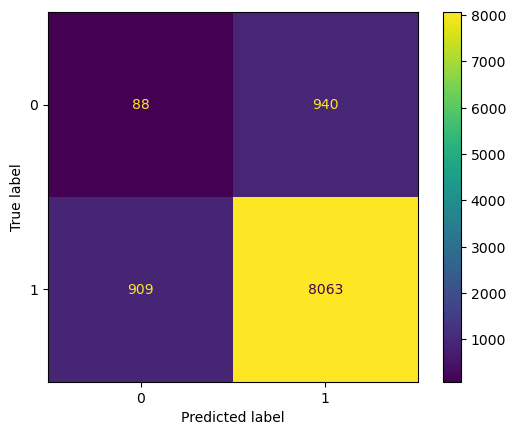

In [25]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

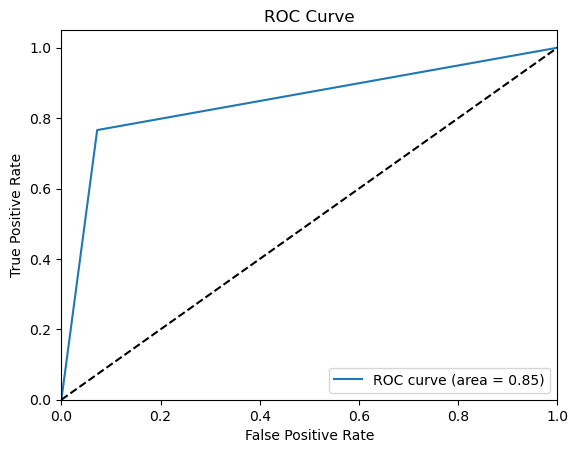

In [26]:
predictions=knncv.predict(X_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,predictions)
roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()